## import modules

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

## use pandas to load csv as dataframe

In [2]:
df = pd.read_csv("./dataset/lotto - data.csv")

In [3]:
# initial dataframe

df 

,회차,추첨일,당첨번호1,당첨번호2,당첨번호3,당첨번호4,당첨번호5,당첨번호6,보너스
0,968,2021.06.19,2,5,12,14,24,39,33
1,967,2021.06.12,1,6,13,37,38,40,9
2,966,2021.06.05,1,21,25,29,34,37,36
3,965,2021.05.29,2,13,25,28,29,36,34
4,964,2021.05.22,6,21,36,38,39,43,30
...,...,...,...,...,...,...,...,...,...
963,5,2003.01.04,16,24,29,40,41,42,3
964,4,2002.12.28,14,27,30,31,40,42,2
965,3,2002.12.21,11,16,19,21,27,31,30
966,2,2002.12.14,9,13,21,25,32,42,2


## breakdown data of column '추첨일' into year, month, day

In [4]:
# create temporary column : 'new_date'
# use `pd.to_datetime` to transform year.month.day data into year-month-day
df['new_date'] = pd.to_datetime(df['추첨일'])

df[['추첨일', 'new_date']]      # check

,추첨일,new_date
0,2021.06.19,2021-06-19
1,2021.06.12,2021-06-12
2,2021.06.05,2021-06-05
3,2021.05.29,2021-05-29
4,2021.05.22,2021-05-22
...,...,...
963,2003.01.04,2003-01-04
964,2002.12.28,2002-12-28
965,2002.12.21,2002-12-21
966,2002.12.14,2002-12-14


In [5]:
# use `df['column'].dt.year` to extract year value
df['draw_year'] = df['new_date'].dt.year

df[['new_date', 'draw_year']]   # check

,new_date,draw_year
0,2021-06-19,2021
1,2021-06-12,2021
2,2021-06-05,2021
3,2021-05-29,2021
4,2021-05-22,2021
...,...,...
963,2003-01-04,2003
964,2002-12-28,2002
965,2002-12-21,2002
966,2002-12-14,2002


In [6]:
# extract month, date in same way
df['draw_month'] = df['new_date'].dt.month
df['draw_date'] = df['new_date'].dt.date

df.iloc[:, -3:]     # check

,draw_year,draw_month,draw_date
0,2021,6,2021-06-19
1,2021,6,2021-06-12
2,2021,6,2021-06-05
3,2021,5,2021-05-29
4,2021,5,2021-05-22
...,...,...,...
963,2003,1,2003-01-04
964,2002,12,2002-12-28
965,2002,12,2002-12-21
966,2002,12,2002-12-14


In [7]:
# remove temporary column 'new_date' and '추첨일'
df.drop(['new_date', '추첨일'], axis = 1, inplace = True)

df  # check

,회차,당첨번호1,당첨번호2,당첨번호3,당첨번호4,당첨번호5,당첨번호6,보너스,draw_year,draw_month,draw_date
0,968,2,5,12,14,24,39,33,2021,6,2021-06-19
1,967,1,6,13,37,38,40,9,2021,6,2021-06-12
2,966,1,21,25,29,34,37,36,2021,6,2021-06-05
3,965,2,13,25,28,29,36,34,2021,5,2021-05-29
4,964,6,21,36,38,39,43,30,2021,5,2021-05-22
...,...,...,...,...,...,...,...,...,...,...,...
963,5,16,24,29,40,41,42,3,2003,1,2003-01-04
964,4,14,27,30,31,40,42,2,2002,12,2002-12-28
965,3,11,16,19,21,27,31,30,2002,12,2002-12-21
966,2,9,13,21,25,32,42,2,2002,12,2002-12-14


## Visualization

In [8]:
# ignore error message
# https://docs.python.org/ko/3/library/warnings.html
import warnings 
warnings.filterwarnings(action='ignore')

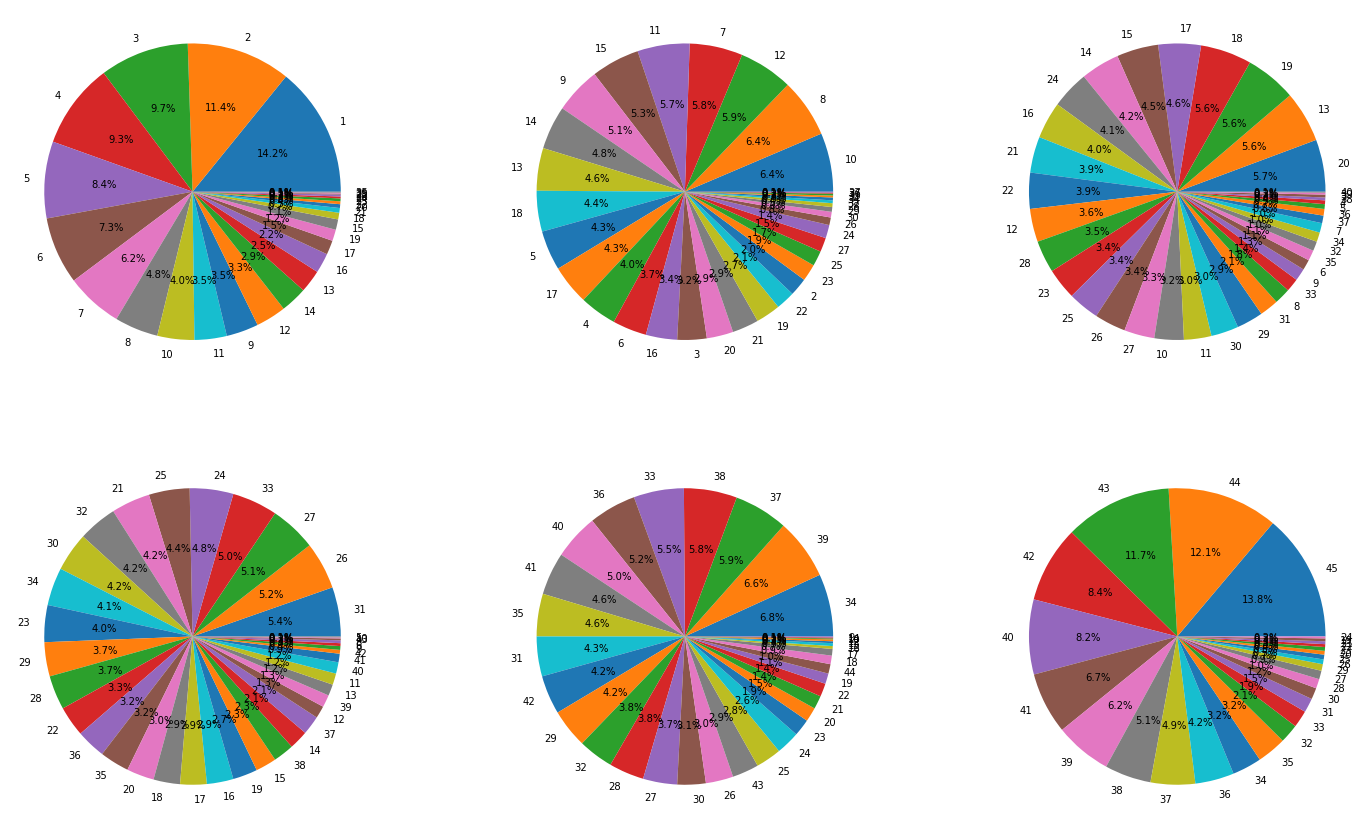

In [12]:
# set canvas
figure, ((ax1, ax2, ax3),(ax4, ax5, ax6)) = plt.subplots(nrows=2, ncols=3)
figure.set_size_inches(25, 15)

numbers = 6
for idx in range(1, numbers+1):
    # eval? : parses the expression argument and evaluates it as a python expression
    # https://docs.python.org/3/library/functions.html#eval
    # https://towardsdatascience.com/python-eval-built-in-function-601f87db191
    
    eval(
        f"ax{idx}.pie(df['당첨번호{idx}'].value_counts().values,\
            labels = df['당첨번호{idx}'].value_counts().index,\
                autopct = '%0.1f%%')"
    )   # fill pie chart

    eval( 
        f"ax{idx}.set_title('lotto number : {idx})"
    )   # set title of subplot

    plt.show()